# Self-made gradient boosting regressor

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
import seaborn as sns

Load data and split data

In [2]:
X, y = load_boston(True)
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)
pd.DataFrame(y).describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [3]:
class gradient_boosting_reg:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None, n_samples = 15,min_samples_leaf = 3):
        self.n_estimators = n_estimators
        self.min_samples_leaf = min_samples_leaf 
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.n_samples = n_samples
        self.initialization = lambda y: np.mean(y) * np.ones([y.shape[0]])
        self.trees_ = []
        self.loss_list = []
        
    def fit(self, X, y):
        self.trees_ = []
        self.loss_list = []
        self.X = X
        self.y = y
        b = self.initialization(y)
        prediction = b.copy()
        resid = y
        
        for t in range(self.n_estimators):            
            tree =DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf = self.min_samples_leaf,random_state=self.random_state)
            tree.fit(X, resid)
            b = tree.predict(X).reshape([X.shape[0]])
            self.trees_.append(tree)
            prediction += self.learning_rate * b
            self.loss_list.append(mean_squared_error(y,prediction))
            resid = (y - prediction)             
        return self
    
    def predict(self, X):
        prediction = np.ones([X.shape[0]]) * np.mean(self.y)
        for t in range(self.n_estimators):
            prediction += self.learning_rate * self.trees_[t].predict(X).reshape([X.shape[0]])
        return prediction

In [4]:
gdb = GradientBoostingRegressor(n_estimators=500, random_state=42)
gdb.fit(X_train, y_train)
print("R2-score: %f" %r2_score(y_test,gdb.predict(X_test)))
print("MSE: %f" %mean_squared_error(y_test,gdb.predict(X_test)))

R2-score: 0.858111
MSE: 11.840031


In [5]:
gdb = gradient_boosting_reg(n_estimators=500, random_state=42)
gdb.fit(X_train, y_train)
print("R2-score: %f" %r2_score(y_test,gdb.predict(X_test)))
print("MSE: %f" %mean_squared_error(y_test,gdb.predict(X_test)))

R2-score: 0.812241
MSE: 15.667648


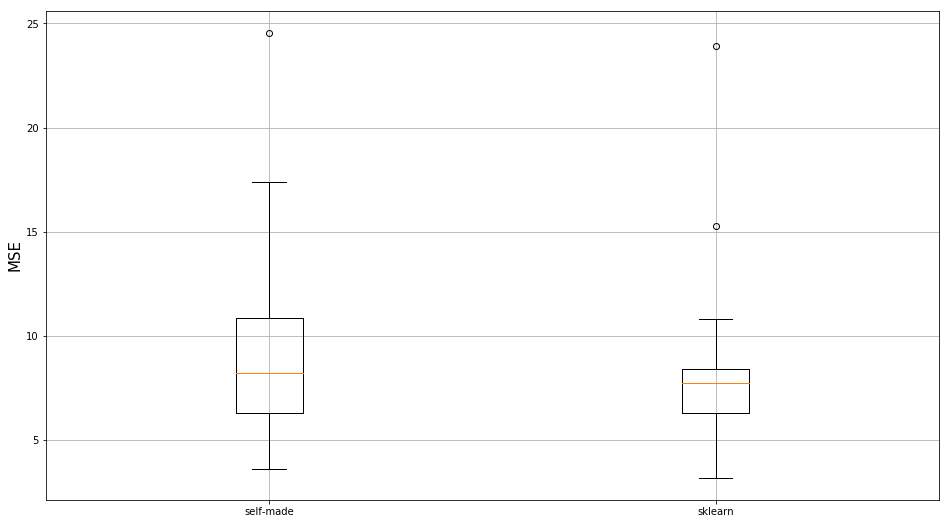

In [6]:
plt.figure(figsize = (16,9))
sklrn_gdb = GradientBoostingRegressor(n_estimators=500)
self_gdb = gradient_boosting_reg(n_estimators=500, random_state=42)

folds = KFold(n_splits=15, shuffle=True)
folds.get_n_splits(X)
self_error_list = []
sklrn_error_list = []
for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    self_error_list.append(mean_squared_error(y_test, self_gdb.fit(X_train,y_train).predict(X_test)))
    sklrn_error_list.append(mean_squared_error(y_test, sklrn_gdb.fit(X_train,y_train).predict(X_test)))
plt.boxplot([self_error_list, sklrn_error_list],labels= ("self-made", "sklearn"))
plt.grid()
plt.ylabel("MSE", fontsize = 15);